- *Forward kinematics* is the problem of finding the position and orientation of the end-effector, given all the joint parameters

- *Inverse kinematics* is simply the reverse problem i.e., given the target position and orientation of the end-effector, we have to find the joint parameters.

In [308]:
import numpy as np
from numpy import cos,sin

# RRR Manipulator

### Figure

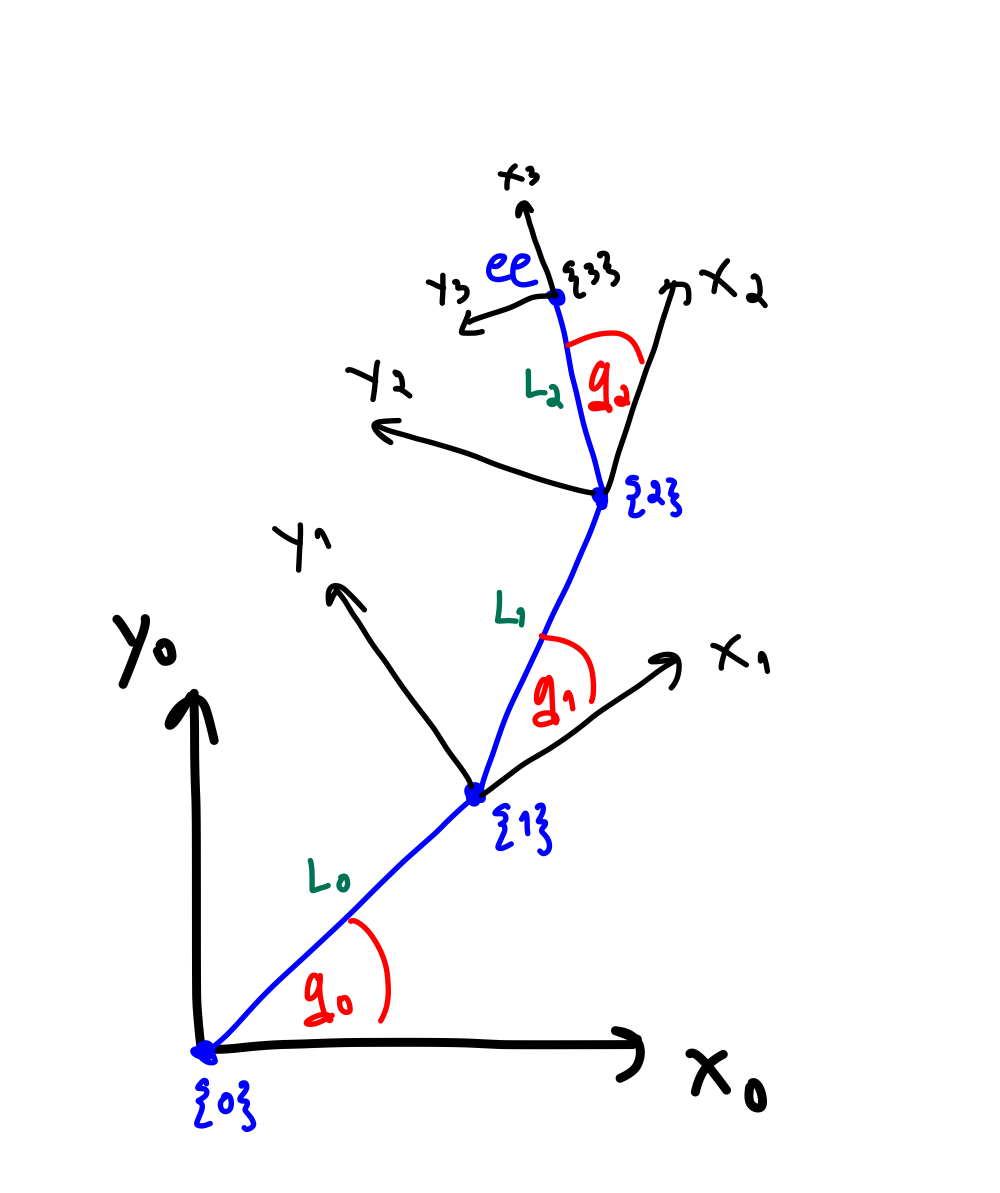

Note: Frame is placed by CCW = +q

### Problem Forward Kinematic

In [309]:
# [Given]
# Length of Links [m]
L0 = 4
L1 = 3
L2 = 2

# Joint angles [rad]
q0 = np.deg2rad(120)
q1 = np.deg2rad(70)
q2 = np.deg2rad(95)

# [Answer]
# End-effector postion [m]
x = 0.0
y = 0.0

### Forward Kinematics (FK)

In [310]:
# Forward Kinematic (FK) = Convert Xee(frame ee) to X0 (frame 0) [Point to Point by q is input] 
#====Solution_1====
Xee = np.matrix([[L0*cos(q0) + L1*cos(q0+q1) + L2*cos(q0+q1+q2)],
                [L0*sin(q0) + L1*sin(q0+q1) + L2*sin(q0+q1+q2)]])
print('=====[FK Solution 1]=====')
print(Xee)
#====Solution_2====
# Translation matrix convert frame 3(ee) to frame 2
T32 = np.matrix([[cos(q2) , -sin(q2),     0,    L2*cos(q2)],
                 [ sin(q2),  cos(q2),     0,    L2*sin(q2)],
                 [       0,        0,     1,             0],
                 [       0,        0,     0,             1]])
# Translation matrix convert frame 2 to frame 1
T21 = np.matrix([[cos(q1) , -sin(q1),     0,    L1*cos(q1)],
                 [ sin(q1),  cos(q1),     0,    L1*sin(q1)],
                 [       0,        0,     1,             0],
                 [       0,        0,     0,             1]])
# Translation matrix convert frame 1 to frame 0
T10 = np.matrix([[ cos(q0), -sin(q0),     0,    L0*cos(q0)],
                 [ sin(q0),  cos(q0),     0,    L0*sin(q0)],
                 [       0,        0,     1,             0],
                 [       0,        0,     0,             1]])
print('=====[FK Solution 2]=====')
Xee = T10@T21@T32
print(Xee)

=====[FK Solution 1]=====
[[-4.43678517]
 [ 1.01130543]]
=====[FK Solution 2]=====
[[ 0.25881905  0.96592583  0.         -4.43678517]
 [-0.96592583  0.25881905  0.          1.01130543]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]


The end effector position x = -4.436785168831582 y = 1.011305429558828 and orientation = -75.00000000000001


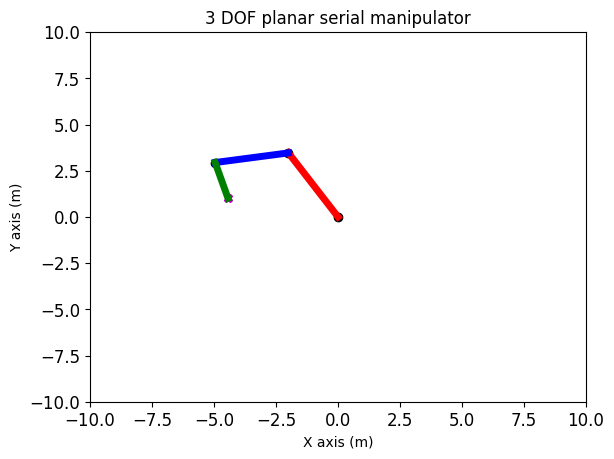

In [311]:
import math
import matplotlib.pyplot as plt

T30 = T10@T21@T32
T20 = T10@T21

# Joint positions
O = [0, 0]                   # Joint 1 position
P1 = [T10[0, 3], T10[1, 3]]  # Joint 2 position
P2 = [T20[0, 3], T20[1, 3]]  # Joint 3 position
P3 = [T30[0, 3], T30[1, 3]]  # End effector position

# Orientation of end effector
Orn = math.atan2(T30[1, 0], T30[0, 0])  # Orientation of end effector
Orn = math.degrees(Orn)

print('The end effector position x =', T30[0, 3], 'y =', T30[1, 3], 'and orientation =', Orn)

# Plot results
plt.figure()
plt.plot(P1[0], P1[1], 'ok', linewidth=5)
plt.plot(P2[0], P2[1], 'ok', linewidth=5)
plt.plot(P3[0], P3[1], 'mX', linewidth=10)
plt.plot(0, 0, 'ok', linewidth=10)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(True, which='minor')
plt.plot([0, P1[0]], [0, P1[1]], 'r', linewidth=5)
plt.plot([P1[0], P2[0]], [P1[1], P2[1]], 'b', linewidth=5)
plt.plot([P2[0], P3[0]], [P2[1], P3[1]], 'g', linewidth=5)
plt.title('3 DOF planar serial manipulator')
plt.xlabel('X axis (m)')
plt.ylabel('Y axis (m)')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Forward Kinematic HERO H4 Version

In [312]:
# [Given]
# Length of Links [m]
L0 = 0.13
L1 = 0.11
L2 = 0.153

# Joint angles [rad]
q0 = np.deg2rad(0)
q1 = np.deg2rad(-10)
q2 = np.deg2rad(10)
print(q0,q1,q2)
# [Answer]
# End-effector postion [m]
x = 0.0
y = 0.0

0.0 -0.17453292519943295 0.17453292519943295


In [313]:
# #====Solution_1====
# Xee = np.matrix([[L0*cos(90) + L1*cos(q0+q1) + L2*cos(q0+q1+q2)],
#                 [L0*sin(90) + L1*sin(q0+q1) + L2*sin(q0+q1+q2)]])
# print('=====[FK Solution 1]=====')
# print(Xee)
#====Solution_2====
# Translation matrix convert frame 3(ee) to frame 2
T23 = np.matrix([[cos(q2) , -sin(q2),     0,            L2],
                 [ sin(q2),  cos(q2),     0,             0],
                 [       0,        0,     1,             0],
                 [       0,        0,     0,             1]])
# Translation matrix convert frame 2 to frame 1
T12 = np.matrix([[cos(q1) , -sin(q1),     0,            0],
                 [ sin(q1),  cos(q1),     0,            L1],
                 [       0,        0,     1,             0],
                 [       0,        0,     0,             1]])
# Translation matrix convert frame 1 to frame 0
T01 = np.matrix([[ cos(np.deg2rad(-90)), -sin(np.deg2rad(-90)),           0,            L0],
                 [ sin(np.deg2rad(-90)),  cos(np.deg2rad(-90)),           0,             0],
                 [                   0,                    0,           1,             0],
                 [                   0,                    0,           0,             1]])
print('=====[FK Solution 2]=====')
Xee = T01@T12@T23
print(Xee)

=====[FK Solution 2]=====
[[ 4.14012991e-17  1.00000000e+00  0.00000000e+00  2.13431829e-01]
 [-1.00000000e+00  4.10220886e-17  0.00000000e+00 -1.50675586e-01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


### Problem Inverse Kinematic

In [314]:
# [Given]
# Length of Links [m]
L0 = 4
L1 = 3
L2 = 2
# End-effector postion [m]
x = -2.0
y =  3.0
phi = 90
# [Answer]
# Joint angles [rad]
q0 = 0.0
q1 = 0.0
q2 = 0.0

### Inverse Kinematic (IK)

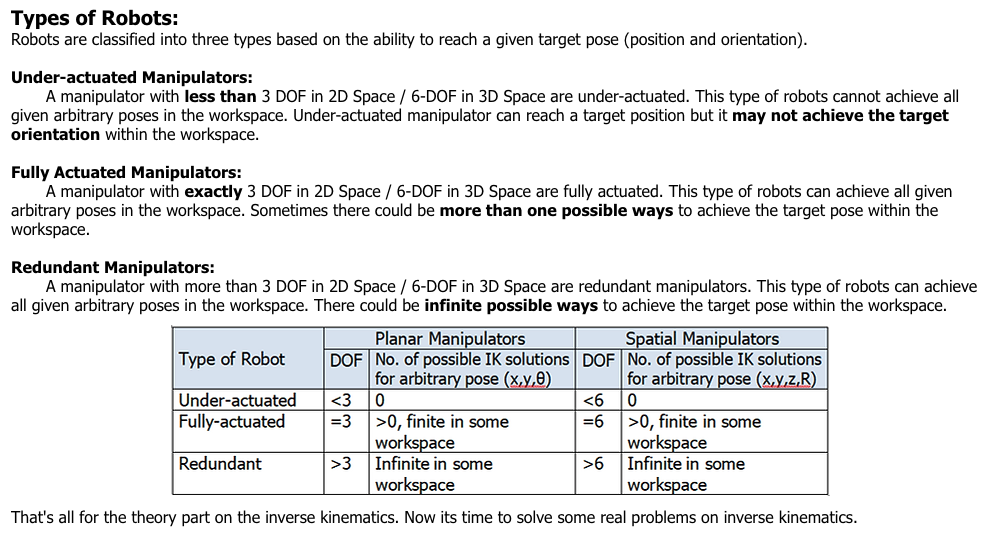

In [315]:
import math

phi = math.radians(phi)

nx = x - L2 * math.cos(phi)  # Calculations for nx and ny
ny = y - L2 * math.sin(phi)

delta = nx ** 2 + ny ** 2  # Calculations for theta2
c1 = (delta - L0 ** 2 - L1 ** 2) / (2 * L0 * L1)
s1 = math.sqrt(1 - c1 ** 2)
if s1.imag != 0:
    raise ValueError('The given point cannot be reached, please try a different value')

q1 = math.atan2(s1, c1)

s0 = ((L0 + L1 * c1) * ny - L1 * s1 * nx) / delta  # Calculation for theta1
c0 = ((L0 + L1 * c1) * nx + L1 * s1 * ny) / delta
q0 = math.atan2(s0, c0)

q2 = phi - q0 - q1  # Calculation for theta3




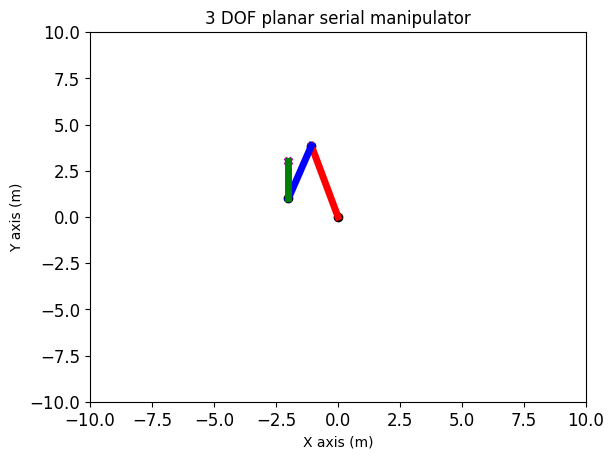

In [316]:
import math
import matplotlib.pyplot as plt
T32 = np.matrix([[cos(q2) , -sin(q2),     0,   L2*cos(q2)],
                 [ sin(q2),  cos(q2),     0,    L2*sin(q2)],
                 [       0,        0,     1,             0],
                 [       0,        0,     0,             1]])
# Translation matrix convert frame 2 to frame 1
T21 = np.matrix([[cos(q1) , -sin(q1),     0,    L1*cos(q1)],
                 [ sin(q1),  cos(q1),     0,    L1*sin(q1)],
                 [       0,        0,     1,             0],
                 [       0,        0,     0,             1]])
# Translation matrix convert frame 1 to frame 0
T10 = np.matrix([[ cos(q0), -sin(q0),     0,    L0*cos(q0)],
                 [ sin(q0),  cos(q0),     0,    L0*sin(q0)],
                 [       0,        0,     1,             0],
                 [       0,        0,     0,             1]])
T30 = T10@T21@T32
T20 = T10@T21
# Joint positions
O = [0, 0]                   # Joint 1 position
P1 = [T10[0, 3], T10[1, 3]]  # Joint 2 position
P2 = [T20[0, 3], T20[1, 3]]  # Joint 3 position
P3 = [T30[0, 3], T30[1, 3]]  # End effector position

# Orientation of end effector
Orn = math.atan2(T30[1, 0], T30[0, 0])  # Orientation of end effector
Orn = math.degrees(Orn)

# Plot results of forward kinematics
plt.figure()
plt.plot(P1[0], P1[1], 'ok', linewidth=5)
plt.plot(P2[0], P2[1], 'ok', linewidth=5)
plt.plot(P3[0], P3[1], 'mX', linewidth=10)
plt.plot(0, 0, 'ok', linewidth=10)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(True, which='minor')
plt.plot([0, P1[0]], [0, P1[1]], 'r', linewidth=5)
plt.plot([P1[0], P2[0]], [P1[1], P2[1]], 'b', linewidth=5)
plt.plot([P2[0], P3[0]], [P2[1], P3[1]], 'g', linewidth=5)
plt.title('3 DOF planar serial manipulator')
plt.xlabel('X axis (m)')
plt.ylabel('Y axis (m)')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
